In [1]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pickle as pkl
import numpy as np
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import time

C:\Users\minha\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#Impostant settings for plotting
from wordcloud import WordCloud
font = {'family' : 'Arial',
         'weight' : 'normal',
         'size'   : 8}
plt.rc('font', **font)

In [3]:
saving_path="C:/Users/minha/Desktop/plots_new/updated/"

In [4]:
#reading necessary inputs for lda from pickle
import pickle as pkl

with open('pickled_1907/data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pkl.load(f)

with open('pickled_1907/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)
with open("pickled_1907/id2word.pkl", 'rb') as f:
    id2word= pkl.load(f)

In [5]:
#Choosing Number of topics
nTopics =11

In [6]:
# Load model
lda_model = LdaModel.load(f'pickled_1907/trained_models/trained_lda_model_{nTopics}.model')

In [7]:
lda_model

In [8]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis =pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.161824  0.146640       1        1  20.393490
7      0.106716 -0.005978       2        1  13.827289
5      0.091188  0.036338       3        1  11.132703
6      0.010102 -0.058487       4        1  11.072795
2      0.107841  0.091263       5        1   8.718213
1      0.006349 -0.103086       6        1   8.486859
0      0.001420 -0.113602       7        1   7.786871
8      0.088848  0.000473       8        1   7.469243
3      0.056192  0.013775       9        1   6.798323
9     -0.228162 -0.221685      10        1   2.940943
4     -0.402316  0.214351      11        1   1.373274, topic_info=           Term          Freq         Total Category  logprob  loglift
2         flood  31550.000000  31550.000000  Default  30.0000  30.0000
797        soil   7077.000000   7077.000000  Default  29.0000  29.0000
8         river  18934.000000  18934.000000  Default  28.0000  28.0000
109       model  24870.000000  24870.000000  Default  27.0000  27.0000
38         flow  12349.000000  12349.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
288       cover    151.954985   2180.332864  Topic11  -5.0297   1.6243
2007        age     92.805817    356.742744  Topic11  -5.5227   2.9415
2480   tropical    101.532723    767.267816  Topic11  -5.4329   2.2655
921   migration     78.763273    261.809133  Topic11  -5.6868   3.0868
639     density     76.498113    876.943875  Topic11  -5.7160   1.8488

[818 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2457      4  0.998583    abundance
1208      9  0.995931           ad
3415      2  0.127656   adaptation
3415      3  0.828751   adaptation
3415      4  0.030394   adaptation
...     ...       ...          ...
1107      7  0.390700         zone
1107      8  0.070257         zone
1107      9  0.038270         zone
1107     10  0.086251         zone
2237      4  0.995905  zooplankton

[1924 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 6, 7, 3, 2, 1, 9, 4, 10, 5])

In [12]:
#defineing topic names. This is based on manual overview of pyLDA vis with other scenarios
topic_names = ['Modeling and forecasting', 
               'Precipiatation and extremes', 
               'Climate change', 
               'Urban risk management',
                'River hydraulics',
               "Wetland and ecology",
               'Groundwater and soil chemistry',
               "Geomorphology",
                "Soil hydrology",
               "Coastal hydrology",
               "Reservoir"]

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Wordclouds

In [9]:
#extracting word frequency from LDA
topic_info = vis.topic_info
topic_info = topic_info[topic_info["Category"] != "Default"]
#topic_info 

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


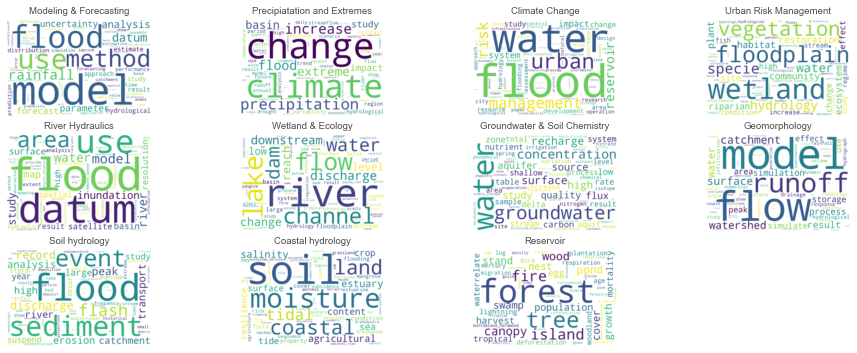

In [10]:
#ploting word cloud for each topic
plt.rcParams['figure.figsize'] = [16, 6]
topic_names = ['Modeling & Forecasting', 'Precipiatation and Extremes', 'Climate Change', 'Urban Risk Management', 
                   'River Hydraulics',"Wetland & Ecology",'Groundwater & Soil Chemistry',"Geomorphology",
                  "Soil hydrology","Coastal hydrology","Reservoir"]
for index,i in enumerate(topic_info["Category"].unique()):
    topic_data=topic_info[topic_info["Category"]==i]
    plot_data = dict(zip(topic_data['Term'].tolist(), topic_data['Freq'].tolist()))
    wc = WordCloud(width=1200, height=800,background_color="white").generate_from_frequencies(plot_data)
    plt.subplot(3,4,index+1)
    #plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic_names[index],alpha=0.7)
#plt.savefig("C:/Users/minha/Desktop/plots/word_cloud2608.jpg",dpi=300,bbox_inches="tight")
plt.savefig(saving_path+"topic_wordclouds_"+ time.strftime("%Y-%m-%d %H%M") + ".png",dpi=150, bbox_inches="tight")

In [13]:
#Looking at the doucments spec
top_words_by_topic =[]
for i,topic in enumerate(topic_info['Category'].unique()):
    topic_x=topic_info[["Term","Freq"]][topic_info["Category"] == topic].reset_index(drop=True).rename(columns={"Term":"Term_"+str(i),"Freq":"Frequency_"+str(i)})
 #   topic_x["Topic name_"+str(i)] = topic_names[i]
    topic_x.sort_values(by="Frequency_"+str(i))
    top_words_by_topic.append(topic_x)

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
